# StressMem word list check 

Victoria, great job with the code to make and check these lists! I've spotted one issue concerning duplicate stems, see below and also see a few notes to you sprinkled throughout below. One thing: when you re-run your notebook, make sure to show your work--leave in the calls to the cool functions you wrote so that I can see how you generate the list in the first place, and also leave in the call to write_csv (or whatever you use) when you save out the word list. That way, if we ever need to re-generate the list(s) from scratch we can. To make that process easier, define variables like "path2words" or "path2results" right at the top of the NB so that new user could just tweak those to get everything to run right on their machine.

In [45]:
%cd ~/Work/Expts/Code
import misc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/danieldillon/Work/Expts/Code


In [46]:
cd '/Users/danieldillon/Work/Expts/StressMem/StressMemWords'

/Users/danieldillon/Work/Expts/StressMem/StressMemWords


In [3]:
ls

DanCheck.ipynb                      option8_lsa_neg_WORKING.csv
WordFormation.ipynb                 option8_lsa_pos_WORKING.csv
balanced_words_option8_WORKING.csv


In [4]:
df = pd.read_csv('balanced_words_option8_WORKING.csv')
df.head()

,Unnamed: 0,Word,MeanValence,MeanArousal,type,letters,frequency,Concreteness,pos,Imagability
0,138,turnoff,2.85,4.26,0,7,36,2.36,noun,2.72
1,107,pest,2.67,5.14,0,4,146,3.96,noun,4.50
2,90,loser,2.85,3.94,0,5,1381,2.35,noun,3.56
3,16,captive,3.27,4.88,0,7,116,3.03,noun,3.82
4,164,worthless,1.89,4.45,0,9,473,1.97,adj,2.62


Best to avoid naming columns/variables 'type' as that's a Python variable name (e.g., type = string, int, float)

In [6]:
del df['Unnamed: 0']

In [8]:
df.type.value_counts()

1    100
0    100
Name: type, dtype: int64

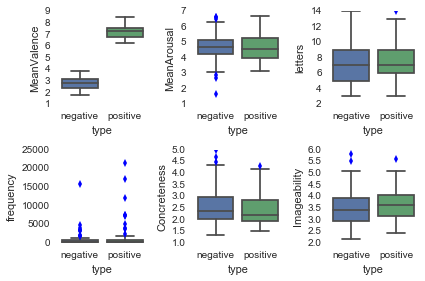

In [25]:
df['type'] = df['type'].replace(to_replace=[0,1],value=['negative','positive'])
df.rename(columns={'Imagability':'Imageability'}, inplace=True)

f = plt.figure()
ct = 1
for val in ['MeanValence','MeanArousal','letters','frequency','Concreteness','Imageability']:
    cumval = 230 + ct
    ax = f.add_subplot(cumval)
    sns.boxplot(y=val,x='type',data=df)
    ct = ct + 1
f.tight_layout()

In [50]:
# I know you already did this--very good job with the code!--but never hurts to check:)

for val in ['MeanValence','MeanArousal','letters','frequency','Concreteness','Imageability']:
    print val
    misc.ttest_2s(df[df.type == 'negative'][val],df[df.type == 'positive'][val]);

MeanValence
t(198) = -60.67, p = 0.000
MeanArousal
t(198) = 0.15, p = 0.882
letters
t(198) = -0.44, p = 0.659
frequency
t(198) = -1.36, p = 0.174
Concreteness
t(198) = 1.23, p = 0.219
Imageability
t(198) = -1.55, p = 0.122


The above looks good but the frequency data seem like they could be off . . . some of those values look crazy high. Actually, the scale for frequency (y-axis) itself is quite high. What are the units there? Anyway let's check the extreme scores . . . 

In [26]:
for i, row_i in df.iterrows():
    if row_i.frequency > 1000:
        print row_i.Word, row_i.frequency

loser 1381
jerk 1690
bastard 3348
failure 1021
terrible 4795
alone 15735
regret 1384
mess 3985
garbage 1331
sad 3232
shame 2120
embarrassed 1093
liar 1792
useless 1017
disgusting 1357
boring 1398
rude 1125
idiot 3377
miserable 1096
pity 1199
special 7577
partner 3836
safe 7303
excited 2479
smart 4909
friend 21384
romantic 1794
progress 1084
positive 1613
healthy 1262
attractive 1256
value 1097
expert 1128
pleased 1455
grateful 1355
fun 12010
capable 1062
honest 3689
happy 16993
lucky 7316
winner 1592
wise 1452
genius 1773
mercy 1291


In [27]:
# Are there any super infrequent words?
for i, row_i in df.iterrows():
    if row_i.frequency < 100:
        print row_i.Word, row_i.frequency

turnoff 36
cynic 56
unwanted 70
gloom 59
untrustworthy 21
unhealthy 83
inadequate 95
bitterness 72
unwelcome 37
idiocy 29
heartbroken 93
hesitation 94
dropout 43
hardship 77
quitter 73
undesirable 33
uninvited 71
maggot 81
vagrant 32
emptiness 92
outcast 67
negligent 51
hater 32
copycat 44
friendless 24
entertainer 84
seeker 47
esteem 86
proficiency 21
lovable 91
dynamo 26
thinker 60
carefree 69
sportsmanship 28
cleverness 26
sophistication 49
spirited 62
idealist 34
respectful 97
allure 30
wellness 21
humorous 75
energetic 66
hugger 21
learner 61
easygoing 22
blissful 27
zest 35
spontaneity 42
adventurer 37
visionary 66
optimist 78
enjoyable 99
openness 20
healer 84
vibrant 52


Victoria, please just double-check: what is the scale for the frequency counts? The words listed above make the whole thing seem plausible (the lower frequency words really do appear to be more rare), but let's look into it.

In [30]:
# This is good, but we will need to include pos in all our analyses as I'm guessing nouns will be better remembered
# than adjectives and we don't want that to confound any other effects
df.groupby('type')['pos'].value_counts()

type      pos 
negative  noun    58
          adj     42
positive  noun    54
          adj     46
dtype: int64

In [36]:
# No duplicates, good
dupes = list(df.duplicated(cols='Word'))
if True in dupes:
    print 'yup'
ct = 0
for x in dupes:
    if x == False:
        ct = ct + 1
print ct

200


/Users/danieldillon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead
  if __name__ == '__main__':


## The words . . .  

In [29]:
# Negative first
ct = 1
for i, row_i in df.iterrows():
    if row_i.type == 'negative':
        print ct, row_i.Word
        ct = ct + 1

1 turnoff
2 pest
3 loser
4 captive
5 worthless
6 cynic
7 traitor
8 distress
9 jerk
10 selfish
11 bastard
12 disappointment
13 insulting
14 unwanted
15 gloom
16 filth
17 dull
18 lazy
19 failure
20 untrustworthy
21 stress
22 prick
23 terrible
24 unhealthy
25 alone
26 inadequate
27 regret
28 bitterness
29 mess
30 irritating
31 garbage
32 annoying
33 irresponsible
34 stinky
35 unwelcome
36 phony
37 idiocy
38 heartbroken
39 reject
40 hesitation
41 sad
42 insecure
43 awkward
44 hypocrite
45 shame
46 anxiety
47 scum
48 dropout
49 disgrace
50 scoundrel
51 grumpy
52 hardship
53 sloppy
54 creep
55 disgust
56 slimy
57 embarrassed
58 overwhelmed
59 fraud
60 vermin
61 unforgivable
62 quitter
63 undesirable
64 burden
65 repulsive
66 slob
67 uninvited
68 menace
69 unemployed
70 maggot
71 liar
72 terrified
73 vagrant
74 useless
75 emptiness
76 disgusting
77 outcast
78 gross
79 negligent
80 nauseous
81 parasite
82 hater
83 unfaithful
84 incompetent
85 unbearable
86 boring
87 inferior
88 rude
89 headach

A concern with the above is words that share a stem--for instance, "idiot" and "idiocy". That's not good, we don't want more intra-list interference for some words vs. others because of this. Here's some good that looks for shared stems, so we can identify problems . . . 

In [44]:
# Potential problems . . . 
# idiocy, idiot
# useless, useful
# hopeless, hopeful
# friendless, friend
# grateful, graceful (not really the same stem but these are so similar it makes me nervous)
# positive (I would not include this or 'negative' in the lists as they are the category names)

for i, row_i in df.iterrows():
    stem = row_i.Word[:3]
    matches = filter(lambda x: row_i.Word[:3] in x[:3], df.Word)
    print i, matches

0 ['turnoff']
1 ['pest']
2 ['loser']
3 ['captive', 'capable']
4 ['worthless']
5 ['cynic']
6 ['traitor', 'traveler']
7 ['distress', 'disappointment', 'disgrace', 'disgust', 'disgusting']
8 ['jerk']
9 ['selfish']
10 ['bastard']
11 ['distress', 'disappointment', 'disgrace', 'disgust', 'disgusting']
12 ['insulting', 'insecure']
13 ['unwanted', 'unwelcome']
14 ['gloom']
15 ['filth']
16 ['dull']
17 ['lazy']
18 ['failure']
19 ['untrustworthy']
20 ['stress']
21 ['prick']
22 ['terrible', 'terrified']
23 ['unhealthy']
24 ['alone']
25 ['inadequate']
26 ['regret']
27 ['bitterness']
28 ['mess']
29 ['irritating', 'irresponsible']
30 ['garbage']
31 ['annoying']
32 ['irritating', 'irresponsible']
33 ['stinky']
34 ['unwanted', 'unwelcome']
35 ['phony']
36 ['idiocy', 'idiot']
37 ['heartbroken', 'headache', 'healthy', 'healer']
38 ['reject']
39 ['hesitation']
40 ['sad']
41 ['insulting', 'insecure']
42 ['awkward']
43 ['hypocrite']
44 ['shame']
45 ['anxiety']
46 ['scum']
47 ['dropout']
48 ['distress', 'dis